In [15]:
import h5py
import pandas as pd
from simpledbf import Dbf5
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# show all columns
pd.options.display.max_columns = None

In [2]:
outputs = '.\\Outputs'

if not os.path.exists(outputs):
    os.makedirs(outputs)

In [11]:
#0,County level hhs by income, jobs by sectorid 
year = 2050
run = 1956
yearlist = [2019,2020,2025,2030,2040,2050]
basepath = r"E:\Projects\REMM2_For_Python3_Internal_Use"
h5_name = "remm_data_2019_base_year_20221214.h5"
basefile = os.path.join(basepath, 'REMM_Base_Year_Data', h5_name)
se_folder = os.path.join(basepath, "TDM\\_TDMv8.3.2_REMM\\1_Inputs\\2_SEData\REMM")

CheckedHAFBforComparison = r".\Inputs\HAFB_jobs_by_year_0821_2340.csv"
policyfile = os.path.join(basepath, "data\\scenario_inputs\\baseline\\zoning_parcels_p.csv")

countyIndicatorFileName = os.path.join(basepath, "REMMRun\\county_indicators_" + str(run) + "_" + str(year) + ".csv")

county_indicator=pd.read_csv(countyIndicatorFileName)
householdControl=pd.read_csv(os.path.join(basepath ,"data\\household_controls.csv"))

# Check Households

In [ ]:
os.path.join(basepath ,"data\\household_controls.csv")

'D:\\\\Josh_Projects\\\\REMM2_For_Python3_Internal_Use_6\\data\\household_controls.csv'

In [ ]:
#1,County level hhs by income
householdControl=pd.read_csv(os.path.join(basepath, "data\household_controls.csv"))
hh_countyI =county_indicator[['county_id','households','hh_inc1','hh_inc2','hh_inc3','hh_inc4']]
hhscontrol=householdControl[householdControl['year'] == year]
hhscontrol_1=hhscontrol[hhscontrol['income_quartile'] == 1]
hhscontrol_1=hhscontrol_1[['cid','number_of_households']]
hhscontrol_1.columns = ['county_id','hh_inc1_c']
hhscontrol_2=hhscontrol[hhscontrol['income_quartile'] == 2]
hhscontrol_2=hhscontrol_2[['cid','number_of_households']]
hhscontrol_2.columns = ['county_id','hh_inc2_c']
hhscontrol_3=hhscontrol[hhscontrol['income_quartile'] == 3]
hhscontrol_3=hhscontrol_3[['cid','number_of_households']]
hhscontrol_3.columns = ['county_id','hh_inc3_c']
hhscontrol_4=hhscontrol[hhscontrol['income_quartile'] == 4]
hhscontrol_4=hhscontrol_4[['cid','number_of_households']]
hhscontrol_4.columns = ['county_id','hh_inc4_c']
hh_check_result = hh_countyI.merge(hhscontrol_1,on='county_id').merge(hhscontrol_2,on='county_id').merge(hhscontrol_3,on='county_id').merge(hhscontrol_4,on='county_id')
hh_check_result['households_c'] = hh_check_result['hh_inc1_c']+hh_check_result['hh_inc2_c']+hh_check_result['hh_inc3_c']+hh_check_result['hh_inc4_c']
hh_check_result['hhdifpct'] = (hh_check_result['households'] -hh_check_result['households_c'])/hh_check_result['households_c']
hh_check_result['hhinc1difpct'] = (hh_check_result['hh_inc1'] -hh_check_result['hh_inc1_c'])/hh_check_result['hh_inc1_c']
hh_check_result['hhinc2difpct'] = (hh_check_result['hh_inc2'] -hh_check_result['hh_inc2_c'])/hh_check_result['hh_inc2_c']
hh_check_result['hhinc3difpct'] = (hh_check_result['hh_inc3'] -hh_check_result['hh_inc3_c'])/hh_check_result['hh_inc3_c']
hh_check_result['hhinc4difpct'] = (hh_check_result['hh_inc4'] -hh_check_result['hh_inc4_c'])/hh_check_result['hh_inc4_c']
hh_check_result.style.format({'households': "{:,}",'hh_inc1': "{:,}",'hh_inc2': "{:,}",'hh_inc3': "{:,}",'hh_inc4': "{:,}",'hh_inc1_c': "{:,}",'hh_inc2_c': "{:,}",'hh_inc3_c': "{:,}",'hh_inc4_c': "{:,}",'households_c':"{:,}",'hhdifpct':"{:.1%}",'hhinc1difpct': "{:.1%}",'hhinc2difpct': "{:.1%}",'hhinc3difpct': "{:.1%}",'hhinc4difpct': "{:.1%}"})
# hh_check_result.to_csv(os.path.join(outputs,'hh_check_result_'+str(run)+'.csv'))

,county_id,households,hh_inc1,hh_inc2,hh_inc3,hh_inc4,hh_inc1_c,hh_inc2_c,hh_inc3_c,hh_inc4_c,households_c,hhdifpct,hhinc1difpct,hhinc2difpct,hhinc3difpct,hhinc4difpct
0,11,"197,333","40,863","44,820","62,337","49,313","40,863","44,820","62,337","49,313","197,333",0.0%,0.0%,0.0%,0.0%,0.0%
1,35,"628,787","171,684","143,346","166,002","147,755","171,684","143,346","166,002","147,755","628,787",0.0%,0.0%,0.0%,0.0%,0.0%
2,49,"396,554","102,870","90,030","112,992","90,662","102,870","90,030","112,992","90,662","396,554",0.0%,0.0%,0.0%,0.0%,0.0%
3,57,"141,461","45,055","35,408","39,114","21,884","45,055","35,408","39,114","21,884","141,461",0.0%,0.0%,0.0%,0.0%,0.0%


# Check Employment

In [ ]:
#2,County level hhs by income, jobs by sectorid 
employmentdControl=pd.read_csv(os.path.join(basepath, "data\employment_controls.csv"))
job_countyI =county_indicator[['county_id','jobs','jobs1','jobs2','jobs3','jobs4','jobs5','jobs6','jobs7','jobs8','jobs9','jobs10']]
employmentdControl=employmentdControl[employmentdControl['year'] == year]
employmentdControl_1=employmentdControl[employmentdControl['sector_id'] == 1]
employmentdControl_1=employmentdControl_1[['cid','number_of_jobs']]
employmentdControl_1.columns = ['county_id','jobs1_c']
employmentdControl_2=employmentdControl[employmentdControl['sector_id'] == 2]
employmentdControl_2=employmentdControl_2[['cid','number_of_jobs']]
employmentdControl_2.columns = ['county_id','jobs2_c']
employmentdControl_3=employmentdControl[employmentdControl['sector_id'] == 3]
employmentdControl_3=employmentdControl_3[['cid','number_of_jobs']]
employmentdControl_3.columns = ['county_id','jobs3_c']
employmentdControl_4=employmentdControl[employmentdControl['sector_id'] == 4]
employmentdControl_4=employmentdControl_4[['cid','number_of_jobs']]
employmentdControl_4.columns = ['county_id','jobs4_c']
employmentdControl_5=employmentdControl[employmentdControl['sector_id'] == 5]
employmentdControl_5=employmentdControl_5[['cid','number_of_jobs']]
employmentdControl_5.columns = ['county_id','jobs5_c']
employmentdControl_6=employmentdControl[employmentdControl['sector_id'] == 6]
employmentdControl_6=employmentdControl_6[['cid','number_of_jobs']]
employmentdControl_6.columns = ['county_id','jobs6_c']
employmentdControl_7=employmentdControl[employmentdControl['sector_id'] == 7]
employmentdControl_7=employmentdControl_7[['cid','number_of_jobs']]
employmentdControl_7.columns = ['county_id','jobs7_c']
employmentdControl_8=employmentdControl[employmentdControl['sector_id'] == 8]
employmentdControl_8=employmentdControl_8[['cid','number_of_jobs']]
employmentdControl_8.columns = ['county_id','jobs8_c']
employmentdControl_9=employmentdControl[employmentdControl['sector_id'] == 9]
employmentdControl_9=employmentdControl_9[['cid','number_of_jobs']]
employmentdControl_9.columns = ['county_id','jobs9_c']
employmentdControl_10=employmentdControl[employmentdControl['sector_id'] == 10]
employmentdControl_10=employmentdControl_10[['cid','number_of_jobs']]
employmentdControl_10.columns = ['county_id','jobs10_c']
emp_check_result = job_countyI.merge(employmentdControl_1,on='county_id').merge(employmentdControl_2,on='county_id').merge(employmentdControl_3,on='county_id').merge(employmentdControl_4,on='county_id').merge(employmentdControl_5,on='county_id').merge(employmentdControl_6,on='county_id').merge(employmentdControl_7,on='county_id').merge(employmentdControl_8,on='county_id').merge(employmentdControl_9,on='county_id').merge(employmentdControl_10,on='county_id')
emp_check_result['job1difpct'] = (emp_check_result['jobs1'] -emp_check_result['jobs1_c'])/emp_check_result['jobs1_c']
emp_check_result['job2difpct'] = (emp_check_result['jobs2'] -emp_check_result['jobs2_c'])/emp_check_result['jobs2_c']
emp_check_result['job3difpct'] = (emp_check_result['jobs3'] -emp_check_result['jobs3_c'])/emp_check_result['jobs3_c']
emp_check_result['job4difpct'] = (emp_check_result['jobs4'] -emp_check_result['jobs4_c'])/emp_check_result['jobs4_c']
emp_check_result['job5difpct'] = (emp_check_result['jobs5'] -emp_check_result['jobs5_c'])/emp_check_result['jobs6_c']
emp_check_result['job6difpct'] = (emp_check_result['jobs6'] -emp_check_result['jobs6_c'])/emp_check_result['jobs6_c']
emp_check_result['job7difpct'] = (emp_check_result['jobs7'] -emp_check_result['jobs7_c'])/emp_check_result['jobs7_c']
emp_check_result['job8difpct'] = (emp_check_result['jobs8'] -emp_check_result['jobs8_c'])/emp_check_result['jobs8_c']
emp_check_result['job9difpct'] = (emp_check_result['jobs9'] -emp_check_result['jobs9_c'])/emp_check_result['jobs9_c']
emp_check_result['job10difpct'] = (emp_check_result['jobs10'] -emp_check_result['jobs10_c'])/emp_check_result['jobs10_c']
emp_check_result.style.format({'jobs': "{:,}",'jobs1': "{:,}",'jobs2': "{:,}",'jobs3': "{:,}",'jobs4': "{:,}",'jobs_c': "{:,}",'jobs2_c': "{:,}",'jobs3_c': "{:,}",'jobs4_c': "{:,}",'jobs1difpct': "{:.1%}",'jobs2difpct': "{:.1%}",'jobs3difpct': "{:.1%}",'jobs4difpct': "{:.1%}",'jobs5difpct': "{:.1%}",'jobs6difpct': "{:.1%}",'jobs7difpct': "{:.1%}",'jobs8difpct': "{:.1%}",'jobs9difpct': "{:.1%}",'jobs10difpct': "{:.1%}"})
# emp_check_result = emp_check_result.to_csv(os.path.join(outputs,'emp_check_result_'+str(run)+'.csv'))

,county_id,jobs,jobs1,jobs2,jobs3,jobs4,jobs5,jobs6,jobs7,jobs8,jobs9,jobs10,jobs1_c,jobs2_c,jobs3_c,jobs4_c,jobs5_c,jobs6_c,jobs7_c,jobs8_c,jobs9_c,jobs10_c,job1difpct,job2difpct,job3difpct,job4difpct,job5difpct,job6difpct,job7difpct,job8difpct,job9difpct,job10difpct
0,11,"249,339","15,216",0.0,"52,480","29,507",17049,32869,62602,0.000000,28072,11544,15216,"29,054","52,480","29,507",17049,32869,62602,198,28072,11544,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
1,35,"1,236,910","75,866",0.0,"191,139","130,863",72549,218422,337409,0.000000,113265,97397,75866,"109,199","191,139","130,863",72549,218422,337409,4285,113265,97397,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
2,49,"544,012","34,478",0.0,"87,309","65,579",28566,108056,136091,0.000000,63958,19975,34478,"67,354","87,309","65,579",28566,108056,136091,1111,63958,19975,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
3,57,"166,567","10,233",0.0,"27,743","22,000",19534,15253,45097,0.000000,18427,8280,10233,"16,731","27,743","22,000",19534,15253,45097,273,18427,8280,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000


# Check Employment (SE)

In [22]:
employment_controls = pd.read_csv(os.path.join(basepath, "data\employment_controls.csv"))
nonremm_taz = pd.read_csv(os.path.join(basepath, "data\WF NonREMM TAZ Forecast - 2022-12-20.csv"))
se_832 = pd.read_csv(os.path.join(se_folder, f'SE_{year}.csv'))
se_900 = pd.read_csv(os.path.join(se_folder, f'taz900_SE_{year}.csv'))

### Check TAZ 8.3.2

In [49]:
ec_year = employment_controls[(employment_controls['year']== year)].copy()
employment_control_by_county_832 = ec_year.pivot(index='cid', columns='sector_id', values='number_of_jobs').reset_index()

# rename columns
lu = {'cid':'CO_FIPS', 1:'FOOD_C', 2:'FM_CONS_C', 3:'GVED_C', 4:'HLTH_C', 5:'MANU_C', 6:'OFFI_C', 7:'OTHR_C', 8:'FM_MING_C', 9:'RETL_C', 10:'WSLE_C', 11:'FM_AGRI_C', 12:'HBJ_C'}
employment_control_by_county_832.rename(lu, axis=1, inplace=True)

# SE 832: aggregate job counts by county
se_832_year = se_832[['CO_FIPS', 'RETL','FOOD','MANU',	'WSLE',	'OFFI',	'GVED',	'HLTH',	'OTHR',	'FM_AGRI',	'FM_MING',	'FM_CONS',	'HBJ']].copy()
se_832_year = se_832_year[se_832_year['CO_FIPS'].isin([0,3]) == False]
se_832_year_county_sum = se_832_year.groupby('CO_FIPS')[['RETL','FOOD','MANU','WSLE','OFFI','GVED',	'HLTH',	'OTHR',	'FM_AGRI',	'FM_MING',	'FM_CONS',	'HBJ']].sum().reset_index()

# merge and compute percentage difference
merge_832 = employment_control_by_county_832.merge(se_832_year_county_sum, on='CO_FIPS',how='left')
merge_832['RETL_DIF%'] = (merge_832['RETL'] -merge_832['RETL_C'])/merge_832['RETL_C']
merge_832['FOOD_DIF%'] = (merge_832['FOOD'] -merge_832['FOOD_C'])/merge_832['FOOD_C']
merge_832['MANU_DIF%'] = (merge_832['MANU'] -merge_832['MANU_C'])/merge_832['MANU_C']
merge_832['WSLE_DIF%'] = (merge_832['WSLE'] -merge_832['WSLE_C'])/merge_832['WSLE_C']
merge_832['OFFI_DIF%'] = (merge_832['OFFI'] -merge_832['OFFI_C'])/merge_832['OFFI_C']
merge_832['GVED_DIF%'] = (merge_832['GVED'] -merge_832['GVED_C'])/merge_832['GVED_C']
merge_832['HLTH_DIF%'] = (merge_832['HLTH'] -merge_832['HLTH_C'])/merge_832['HLTH_C']
merge_832['OTHR_DIF%'] = (merge_832['OTHR'] -merge_832['OTHR_C'])/merge_832['OTHR_C']
merge_832['AGRI_DIF%'] = (merge_832['FM_AGRI'] -merge_832['FM_AGRI_C'])/merge_832['FM_AGRI_C']
merge_832['MING_DIF%'] = (merge_832['FM_MING'] -merge_832['FM_MING_C'])/merge_832['FM_MING_C']
merge_832['CONS_DIF%'] = (merge_832['FM_CONS'] -merge_832['FM_CONS_C'])/merge_832['FM_CONS_C']
merge_832['HBJ_DIF%'] = (merge_832['HBJ'] -merge_832['HBJ_C'])/merge_832['HBJ_C']

# display table
merge_832.style.format({'RETL_DIF%': "{:.1%}",'FOOD_DIF%': "{:.1%}",'MANU_DIF%': "{:.1%}",'WSLE_DIF%': "{:.1%}",
                        'OFFI_DIF%': "{:.1%}",'GVED_DIF%': "{:.1%}",'HLTH_DIF%': "{:.1%}",'OTHR_DIF%': "{:.1%}",
                        'AGRI_DIF%': "{:.1%}",'MING_DIF%': "{:.1%}", 'CONS_DIF%': "{:.1%}",'HBJ_DIF%': "{:.1%}"})

,CO_FIPS,FOOD_C,FM_CONS_C,GVED_C,HLTH_C,MANU_C,OFFI_C,OTHR_C,FM_MING_C,RETL_C,WSLE_C,FM_AGRI_C,HBJ_C,RETL,FOOD,MANU,WSLE,OFFI,GVED,HLTH,OTHR,FM_AGRI,FM_MING,FM_CONS,HBJ,RETL_DIF%,FOOD_DIF%,MANU_DIF%,WSLE_DIF%,OFFI_DIF%,GVED_DIF%,HLTH_DIF%,OTHR_DIF%,AGRI_DIF%,MING_DIF%,CONS_DIF%,HBJ_DIF%
0,11,15216,29054,52480,29507,17049,32869,62602,198,28072,11544,1354,8408,27985.000000,15211.000000,17045.000000,11540.000000,32855.000000,52461.000000,29420.000000,62504.000000,1354.000000,198.000000,29054.000000,8408.000000,-0.3%,-0.0%,-0.0%,-0.0%,-0.0%,-0.0%,-0.3%,-0.2%,0.0%,0.0%,0.0%,0.0%
1,35,75866,109199,191139,130863,72549,218422,337409,4285,113265,97397,1610,45574,113268.000000,75866.000000,72549.000000,97401.000000,218422.000000,191139.000000,130863.000000,337414.000000,1610.000000,4285.000000,109199.000000,45574.000000,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,-0.0%,-0.0%,0.0%,0.0%
2,49,34478,67354,87309,65579,28566,108056,136091,1111,63958,19975,3256,24172,63958.000000,34478.000000,28566.000000,19975.000000,108056.000000,87309.000000,65579.000000,136091.000000,3256.000000,1111.000000,67354.000000,24172.000000,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,-0.0%
3,57,10233,16731,27743,22000,19534,15253,45097,273,18427,8280,1358,4976,18511.000000,10238.000000,19538.000000,8280.000000,15267.000000,27762.000000,22087.000000,45190.000000,1358.000000,273.000000,16731.000000,4976.000000,0.5%,0.0%,0.0%,0.0%,0.1%,0.1%,0.4%,0.2%,0.0%,0.0%,0.0%,0.0%


### Check TAZ 9.0

In [53]:
# add nonremm taz to control total
nrt_year = nonremm_taz[nonremm_taz['YEAR']==year][['CO_FIPS', 'RETL','FOOD','MANU',	'WSLE',	'OFFI',	'GVED',	'HLTH',	'OTHR',	'AGRI',	'MING',	'CONS',	'HBJ']].copy()
nrt_year_county_sum = nrt_year.groupby('CO_FIPS')[['RETL','FOOD','MANU','WSLE',	'OFFI',	'GVED',	'HLTH',	'OTHR',	'AGRI',	'MING',	'CONS',	'HBJ']].sum().reset_index()
ec_nrt = employment_control_by_county_832.merge(nrt_year_county_sum, on='CO_FIPS', how='left')
ec_nrt['RETL_C'] = ec_nrt['RETL'] + ec_nrt['RETL_C']
ec_nrt['FOOD_C'] = ec_nrt['FOOD'] + ec_nrt['FOOD_C']
ec_nrt['MANU_C'] = ec_nrt['MANU'] + ec_nrt['MANU_C']
ec_nrt['WSLE_C'] = ec_nrt['WSLE'] + ec_nrt['WSLE_C']
ec_nrt['OFFI_C'] = ec_nrt['OFFI'] + ec_nrt['OFFI_C']
ec_nrt['GVED_C'] = ec_nrt['GVED'] + ec_nrt['GVED_C']
ec_nrt['HLTH_C'] = ec_nrt['HLTH'] + ec_nrt['HLTH_C']
ec_nrt['OTHR_C'] = ec_nrt['OTHR'] + ec_nrt['OTHR_C']
ec_nrt['FM_AGRI_C'] = ec_nrt['AGRI'] + ec_nrt['FM_AGRI_C']
# ec_nrt['FM_MING_C'] = ec_nrt['FM_MING_C']
ec_nrt['FM_CONS_C'] = ec_nrt['CONS'] + ec_nrt['FM_CONS_C']
ec_nrt['HBJ_C'] = ec_nrt['HBJ'] + ec_nrt['HBJ_C']
employment_control_by_county_900 = ec_nrt[['CO_FIPS', 'RETL_C','FOOD_C','MANU_C','WSLE_C','OFFI_C',	'GVED_C','HLTH_C',	'OTHR_C','FM_AGRI_C','FM_MING_C', 'FM_CONS_C','HBJ_C']].copy()

# SE 900: aggregate job counts by county
se_900_year = se_900[['CO_FIPS', 'RETL','FOOD','MANU',	'WSLE',	'OFFI',	'GVED',	'HLTH',	'OTHR',	'FM_AGRI',	'FM_MING',	'FM_CONS',	'HBJ']].copy()
se_900_year_county_sum = se_900_year.groupby('CO_FIPS')[['RETL','FOOD','MANU','WSLE',	'OFFI',	'GVED',	'HLTH',	'OTHR',	'FM_AGRI',	'FM_MING',	'FM_CONS',	'HBJ']].sum().reset_index().sort_values('CO_FIPS')


# merge and compute percentage difference
merge_900 = employment_control_by_county_900.merge(se_900_year_county_sum, on='CO_FIPS',how='left')
merge_900['RETL_DIF%'] = (merge_900['RETL'] -merge_900['RETL_C'])/merge_900['RETL_C']
merge_900['FOOD_DIF%'] = (merge_900['FOOD'] -merge_900['FOOD_C'])/merge_900['FOOD_C']
merge_900['MANU_DIF%'] = (merge_900['MANU'] -merge_900['MANU_C'])/merge_900['MANU_C']
merge_900['WSLE_DIF%'] = (merge_900['WSLE'] -merge_900['WSLE_C'])/merge_900['WSLE_C']
merge_900['OFFI_DIF%'] = (merge_900['OFFI'] -merge_900['OFFI_C'])/merge_900['OFFI_C']
merge_900['GVED_DIF%'] = (merge_900['GVED'] -merge_900['GVED_C'])/merge_900['GVED_C']
merge_900['HLTH_DIF%'] = (merge_900['HLTH'] -merge_900['HLTH_C'])/merge_900['HLTH_C']
merge_900['OTHR_DIF%'] = (merge_900['OTHR'] -merge_900['OTHR_C'])/merge_900['OTHR_C']
merge_900['AGRI_DIF%'] = (merge_900['FM_AGRI'] -merge_900['FM_AGRI_C'])/merge_900['FM_AGRI_C']
merge_900['MING_DIF%'] = (merge_900['FM_MING'] -merge_900['FM_MING_C'])/merge_900['FM_MING_C']
merge_900['CONS_DIF%'] = (merge_900['FM_CONS'] -merge_900['FM_CONS_C'])/merge_900['FM_CONS_C']
merge_900['HBJ_DIF%'] = (merge_900['HBJ'] -merge_900['HBJ_C'])/merge_900['HBJ_C']

# display table
merge_900.style.format({'RETL_DIF%': "{:.1%}",'FOOD_DIF%': "{:.1%}",'MANU_DIF%': "{:.1%}",'WSLE_DIF%': "{:.1%}",
                        'OFFI_DIF%': "{:.1%}",'GVED_DIF%': "{:.1%}",'HLTH_DIF%': "{:.1%}",'OTHR_DIF%': "{:.1%}",
                        'AGRI_DIF%': "{:.1%}",'MING_DIF%': "{:.1%}", 'CONS_DIF%': "{:.1%}",'HBJ_DIF%': "{:.1%}"})

,CO_FIPS,RETL_C,FOOD_C,MANU_C,WSLE_C,OFFI_C,GVED_C,HLTH_C,OTHR_C,FM_AGRI_C,FM_MING_C,FM_CONS_C,HBJ_C,RETL,FOOD,MANU,WSLE,OFFI,GVED,HLTH,OTHR,FM_AGRI,FM_MING,FM_CONS,HBJ,RETL_DIF%,FOOD_DIF%,MANU_DIF%,WSLE_DIF%,OFFI_DIF%,GVED_DIF%,HLTH_DIF%,OTHR_DIF%,AGRI_DIF%,MING_DIF%,CONS_DIF%,HBJ_DIF%
0,11,28072.000000,15216.000000,17049,11544,32869.000000,52480.000000,29507.000000,62602.000000,1354,198,29054,8408,28072.000000,15216.000000,17049.000000,11544.000000,32869.000000,52485.000000,29507.000000,62602.000000,1354.000000,198.000000,29053.802773,8408.000000,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,-0.0%,0.0%
1,35,113344.500000,76651.300000,72549,97397,218433.000000,191240.900000,130863.000000,337769.900000,1610,4285,109209,45574,113344.500000,76651.300000,72549.000000,97397.000000,218433.000000,191240.900000,130863.000000,337769.900000,1610.000000,4285.227772,109208.944591,45574.000000,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,-0.0%,0.0%
2,49,64084.200000,34636.100000,28566,19975,108056.800000,87329.500000,65606.700000,136277.000000,3256,1111,67364,24172,64008.200000,34633.100000,28566.000000,19897.000000,108056.800000,87309.500000,65602.700000,136256.000000,3256.000000,1111.000000,67321.492225,24147.003102,-0.1%,-0.0%,0.0%,-0.4%,0.0%,-0.0%,-0.0%,-0.0%,0.0%,0.0%,-0.1%,-0.1%
3,57,18427.000000,10233.000000,19534,8280,15253.000000,27743.000000,22000.000000,45097.000000,1358,273,16731,4976,18427.000000,10233.000000,19534.000000,8280.000000,15253.000000,27743.000000,22000.000000,45097.000000,1358.000000,273.000000,16728.382641,4973.996779,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,0.0%,-0.0%,-0.0%


# Check Hill Air Force Base

In [146]:
#3,Hill Air Force refer to redevelopment.ipynb
#HAF Jobs
# tazs= 527,540,541,623,626,628,629,630,631,632,633,634,644,647]
# checked0821 basefile "E:\temp\HAFB_jobs_by_year_0821_2340.csv"
Buildings = pd.read_csv(r".\Inputs\HAFBtaz.csv")
jobsBase = pd.read_hdf(basefile, 'jobs')
jobParcel=jobsBase.groupby(['building_id']).count().reset_index()
jobsHAFB = pd.merge(jobParcel, Buildings, how="left", on=["building_id", "building_id"])
jobsHAFB=jobsHAFB[jobsHAFB['TAZ']>0]
jobsHAFB['yr'] = 0
for yr in yearlist:
    progression_jobs = pd.read_csv(os.path.join(basepath,"REMMRun\\run"+str(run)+"year" + str(yr) + "jobs.csv"),index_col = "building_id")
    jobParcel_y=progression_jobs.groupby('building_id').count().reset_index()
    jobParcel_y = pd.merge(jobParcel_y, Buildings, how="left", on=["building_id", "building_id"])
    jobParcel_y=jobParcel_y[jobParcel_y['TAZ'] > 0].copy()
    jobParcel_y['yr'] = yr
    jobsHAFB = jobsHAFB.append(jobParcel_y)
jobsHAFB=jobsHAFB[['building_id','cid','yr','TAZ']]    
jobsHAFB.to_csv(os.path.join(outputs,'HAFB_jobs_by_year_taz_0821_'+str(run)+'.csv'))
hops=jobsHAFB.groupby(['yr']).sum().reset_index()
hops=hops[['yr','cid']]
hops.columns =['year','HAFBjobs']
checked = pd.read_csv(CheckedHAFBforComparison)
checked=checked[['year','cid']]
checked.columns =['year','HAFBjobsChecked']
HAFB_check_result = hops.merge(checked,on='year')
HAFB_check_result['dif'] = HAFB_check_result['HAFBjobs']-HAFB_check_result['HAFBjobsChecked']
HAFB_check_result['difpct'] = HAFB_check_result['dif']/HAFB_check_result['HAFBjobsChecked']
# HAFB_check_result.style.format({'HAFBjobs': "{:,}",'HAFBjobsChecked': "{:,}",'difpct':"{:.1%}"})
HAFB_check_result.to_csv(os.path.join(outputs,'HAFB_jobs_by_year_'+str(run)+'.csv'))


c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-REMM\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-REMM\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-REMM\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-REMM\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will 

In [147]:
HAFB_check_result.head(10)

,year,HAFBjobs,HAFBjobsChecked,dif,difpct
0,0,31941,31305,636,0.020316
1,2019,31941,31305,636,0.020316
2,2020,33406,32813,593,0.018072
3,2025,37856,36822,1034,0.028081
4,2030,42980,41884,1096,0.026168
5,2040,49199,48099,1100,0.022869
6,2050,49111,47997,1114,0.023210


In [148]:
# progression_jobs.groupby('building_id').count().reset_index()

In [149]:
#4,1centers refer to redevelopment.ipynb
#policy parcels DU and JobSpace by areaName 
parcels = pd.read_csv(policyfile)
parcels =parcels[['parcel_id','TAZID_900','AreaName','locnote']].copy()
parcels = parcels.sort_values(by=['parcel_id','TAZID_900','AreaName','locnote'])
parcels = parcels.drop_duplicates(subset=['parcel_id','TAZID_900','AreaName','locnote'], keep='last')
col_names =  ['Year', 'parcel_id','locnote','AreaName', 'residential_units','job_spaces']
my_df  = pd.DataFrame(columns = col_names)
for yr in yearlist:#
    #print(year)
    progression = pd.read_csv(os.path.join(basepath, "REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv"))
    progression1 =progression[['parcel_id','job_spaces','building_id','year_built','residential_units','county_id']]
    progression2=pd.merge(progression1, parcels, how="left", on=["parcel_id", "parcel_id"])
    progression3=progression2[['parcel_id','locnote','AreaName', 'residential_units','job_spaces','county_id']].copy()
    progression3['Year']=yr
    my_df = my_df.append(progression3, ignore_index=True)
result=my_df.groupby(['Year','AreaName']).sum().reset_index()
output0=result.sort_values(['AreaName', 'Year'], ascending = [True, True] )
output0.to_csv('DU_JSbyPolicyAreaNameYear_'+str(run)+'.csv')

result_loc=my_df.groupby(['Year','county_id','locnote']).sum().reset_index()
output1=result_loc.sort_values(['county_id','locnote', 'Year'], ascending = [True, True, True] )
output1.to_csv('DU_JSbyPolicylocnoteYear_'+str(run)+'.csv')

In [150]:
# #4,centers charts refer to redevelopment.ipynb
# Area_name =  result.AreaName.values.tolist()
# for area in Area_name:
#     thisarea = result[result['AreaName'] == area]
#     thisarea.plot(x='Year', y = 'residential_units') #, kind='scatter'
#     plt.title(area + ' Dwelling Units')
#     plt.show()
#     thisarea.plot(x='Year', y = 'job_spaces') #, kind='scatter'
#     plt.title(area + ' Job Space')
#     plt.show()

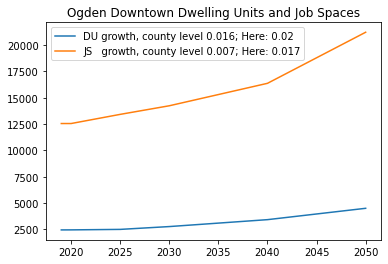

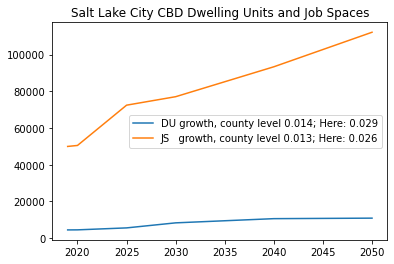

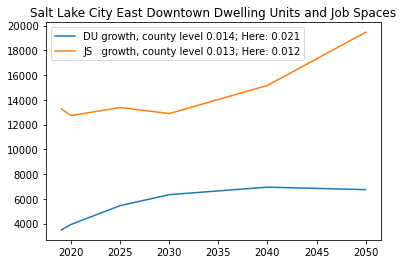

In [151]:
arealist =['Ogden Downtown', 'Salt Lake City CBD','Salt Lake City East Downtown']
DUgrowth =[0.016, 0.014,0.014]
FARgrowth =[0.007, 0.013,0.013]
index =[0,1,2]
for ind in index:
    Area1 = arealist[ind]
    cbdOgden = output0[output0['AreaName'] == Area1]
    x1 = cbdOgden['Year']
    y1 = cbdOgden['residential_units']
    x2 = cbdOgden['Year']
    y2 = cbdOgden['job_spaces']
    plt.plot(x1, y1, label = 'DU growth, county level '   + str(round(DUgrowth[ind],3)) + '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'residential_units'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'residential_units'].values[0],1/31)-1,3))) #, kind='scatter'
    plt.plot(x2, y2, label = 'JS   growth, county level ' + str(round(FARgrowth[ind],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'job_spaces'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'job_spaces'].values[0],1/31)-1,3))) #, kind='scatter'
    plt.title(Area1 + ' Dwelling Units and Job Spaces')
    plt.legend()
    plt.show()

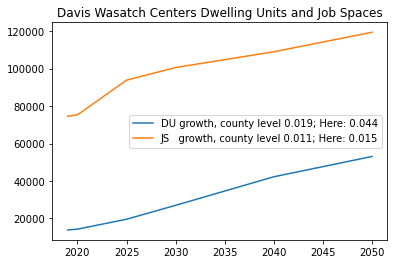

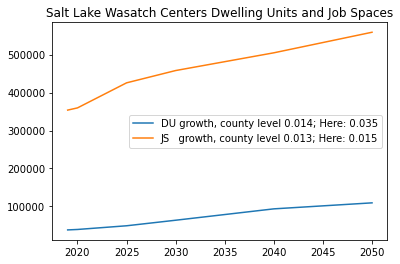

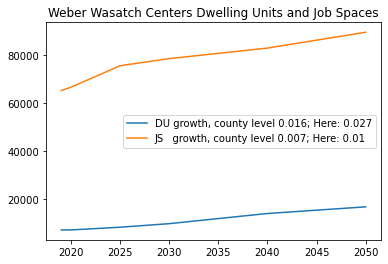

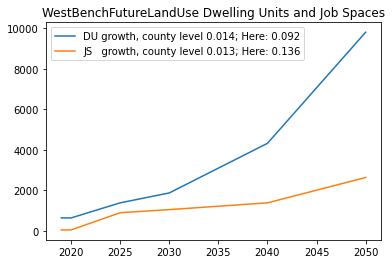

In [152]:
arealist =['Davis Wasatch Centers', 'Salt Lake Wasatch Centers','Weber Wasatch Centers']
countylist =[11, 35, 57]
DUgrowth =[0.019, 0.014 ,0.016]
FARgrowth =[0.011,0.013, 0.007]
index =[0,1,2]
for ind in index:
    Area1 = arealist[ind]
    cbdOgden = output1[(output1['locnote'] == 'WFRCCenters') & (output1['county_id'] == countylist[ind])]
    x1 = cbdOgden['Year']
    y1 = cbdOgden['residential_units']
    x2 = cbdOgden['Year']
    y2 = cbdOgden['job_spaces']
    plt.plot(x1, y1, label = 'DU growth, county level ' + str(round(DUgrowth[ind],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'residential_units'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'residential_units'].values[0],1/31)-1,3))) #, kind='scatter'
    plt.plot(x2, y2, label = 'JS   growth, county level ' + str(round(FARgrowth[ind],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'job_spaces'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'job_spaces'].values[0],1/31)-1,3))) #, kind='scatter'
    plt.title(Area1 + ' Dwelling Units and Job Spaces')
    plt.legend()
    plt.show()
Area1 = 'WestBenchFutureLandUse'
cbdOgden = output1[(output1['locnote'] == 'WestBenchFutureLandUse') & (output1['county_id'] == 35)]
x1 = cbdOgden['Year']
y1 = cbdOgden['residential_units']
x2 = cbdOgden['Year']
y2 = cbdOgden['job_spaces']
plt.plot(x1, y1, label = 'DU growth, county level ' + str(round(DUgrowth[1],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'residential_units'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'residential_units'].values[0],1/31)-1,3))) #, kind='scatter'
plt.plot(x2, y2, label = 'JS   growth, county level ' + str(round(FARgrowth[1],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'job_spaces'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'job_spaces'].values[0],1/31)-1,3))) #, kind='scatter'
plt.title(Area1 + ' Dwelling Units and Job Spaces')
plt.legend()
plt.show()   

In [153]:
#4,15 DU and JS in a Wasatch Center parcel list from Utah Counties
parcels_center = pd.read_csv('parcels_wasatch_centers_eq.csv')
parcels_center = parcels_center[['parcel_id', 'AreaName','AreaType', 'Area']]
parcels_center['Area'] = 'Center'
col_names =  ['Year', 'parcel_id','AreaName', 'AreaType', 'Area', 'residential_units','job_spaces']
my_df  = pd.DataFrame(columns = col_names)
for yr in yearlist:#
    #print(year)

    progression = pd.read_csv(os.path.join(basepath, "REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv"))

    #progression = pd.read_csv(r"E:\REMM2_For_Python3\REMMRun\run"+str(run)+"year" + str(yr) + "allbuildings.csv")
    progression1 =progression[['parcel_id','job_spaces','building_id','year_built','residential_units','county_id']]
    progression2=pd.merge(progression1, parcels_center, how="left", on=["parcel_id", "parcel_id"])
    progression3=progression2[['parcel_id', 'AreaName', 'AreaType', 'Area', 'residential_units','job_spaces','county_id']]
    progression3['Year']=yr
    my_df = my_df.append(progression3, ignore_index=True)
my_df=my_df.fillna('NonCenter')
result_loc0=my_df.groupby(['Year','county_id','AreaName']).sum().reset_index()
result_loc0=result_loc0[['Year','county_id', 'AreaName', 'residential_units','job_spaces']]
output0=result_loc0.sort_values(['AreaName', 'county_id','Year'], ascending = [True, True, True] )
output0.to_csv('DU_JSbyCenterNameYear_'+str(run)+'.csv')
result_loc=my_df.groupby(['Year','county_id','Area']).sum().reset_index()
result_loc=result_loc[['Year','county_id', 'Area', 'residential_units','job_spaces']]
output1=result_loc.sort_values(['Area', 'county_id','Year'], ascending = [True, True, True] )
output1.to_csv('DU_JSbyCentersOrNotYear_'+str(run)+'.csv')
result_loc2=output1.groupby(['Year','county_id']).sum().reset_index()
result_loc2['Area'] ='Z_all'
result_loc2=result_loc2[['Year','county_id', 'Area', 'residential_units','job_spaces']]
result_loc2 = result_loc.append(result_loc2, ignore_index=True)
output2=result_loc2.sort_values(['county_id','Year','Area' ], ascending = [True, True, True] )
output2 =output2[output2['Year'].isin([2019,2050])]
# output2.to_csv('DU_JSbyCentersOrNotGrowth2019_2050_'+str(run)+'.csv')

c:\Users\jreynolds\AppData\Local\ESRI\conda\envs\arcgispro-py3-REMM\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


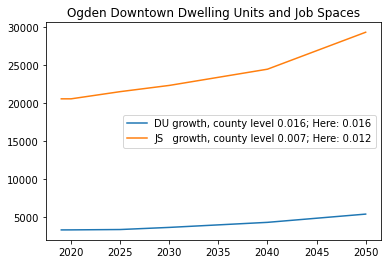

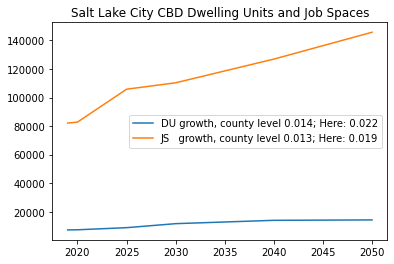

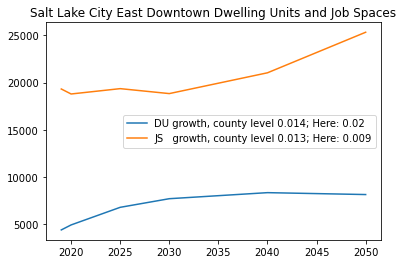

In [154]:
arealist =['Ogden Downtown', 'Salt Lake City CBD','Salt Lake City East Downtown']
DUgrowth =[0.016, 0.014,0.014]
FARgrowth =[0.007, 0.013,0.013]
index =[0,1,2]
for ind in index:
    Area1 = arealist[ind]
    cbdOgden = output0[output0['AreaName'] == Area1]
    x1 = cbdOgden['Year']
    y1 = cbdOgden['residential_units']
    x2 = cbdOgden['Year']
    y2 = cbdOgden['job_spaces']
    plt.plot(x1, y1, label = 'DU growth, county level ' + str(round(DUgrowth[ind],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'residential_units'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'residential_units'].values[0],1/31)-1,3))) #, kind='scatter'
    plt.plot(x2, y2, label = 'JS   growth, county level ' + str(round(FARgrowth[ind],3))+ '; Here: ' + str(round(pow(cbdOgden.loc[cbdOgden['Year']==2050,'job_spaces'].values[0]/cbdOgden.loc[cbdOgden['Year']==2019,'job_spaces'].values[0],1/31)-1,3))) #, kind='scatter'
    plt.title(Area1 + ' Dwelling Units and Job Spaces')
    plt.legend()
    plt.show()

In [155]:
# #4,2 DU and JobSpace by county
# col_names =  ['Year', 'parcel_id','county_id','job_spaces','building_id','year_built','residential_units']
# my_df  = pd.DataFrame(columns = col_names)
# for yr in yearlist:#
#     #print(year)
#     progression = pd.read_csv(os.path.join(basepath, "REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv"))
#     progression =progression[['parcel_id','county_id','job_spaces','building_id','year_built','residential_units']].copy()
#     progression['Year']=yr
#     my_df = my_df.append(progression, ignore_index=True)
# result=my_df.groupby(['Year','county_id']).sum().reset_index()
# result.to_csv(os.path.join(outputs,'DU_JSbyCountyYear_'+str(run)+'.csv'))

# my_df_wfrc=my_df.loc[my_df['county_id'].isin([11,35,57])]
# my_df_wfrc=my_df_wfrc[['Year','residential_units','job_spaces']].copy()
# result_wfrc=my_df_wfrc.groupby(['Year']).sum().reset_index()
# result_wfrc.to_csv(os.path.join(outputs,'DU_JS_WFRC_ByYear_'+str(run)+'.csv'))

In [156]:
# #5,MF/SF at regional and county level
# col_names_region =  ['Year','SF','MF']
# regional_DU_byYear  = pd.DataFrame(columns = col_names_region)
# col_names_county =  ['county_id','Year','SF','MF']
# county_DU_byYear  = pd.DataFrame(columns = col_names_county)
# for yr in yearlist:#[2019]: 
#     progression = pd.read_csv(os.path.join(basepath, "REMMRun\\run"+str(run)+"year" + str(yr) + "allbuildings.csv"))
#     progression =progression[['county_id','building_type_id','year_built','residential_units']]
#     result0=progression.groupby(['building_type_id']).sum().reset_index()
#     result0=result0[['building_type_id','residential_units']]
#     result0['Year']=yr
#     result_1=result0[result0['building_type_id'] == 1]
#     result_1=result_1[['Year','residential_units']]
#     result_1.columns = ['Year','SF']
#     result_2=result0[result0['building_type_id'] == 2]
#     result_2=result_2[['Year','residential_units']]
#     result_2.columns = ['Year','MF']
#     result = result_1.merge(result_2,on='Year')
#     regional_DU_byYear = regional_DU_byYear.append(result, ignore_index=True)
    
#     cresult0=progression.groupby(['county_id','building_type_id']).sum().reset_index()
#     cresult0=cresult0[['county_id','building_type_id','residential_units']]
#     cresult0['Year']=yr
#     cresult_1=cresult0[cresult0['building_type_id'] == 1]
#     cresult_1=cresult_1[['county_id','Year','residential_units']]
#     cresult_1.columns = ['county_id','Year','SF']
#     cresult_2=cresult0[cresult0['building_type_id'] == 2]
#     cresult_2=cresult_2[['county_id','Year','residential_units']]
#     cresult_2.columns = ['county_id','Year','MF']
#     cresult = cresult_1.merge(cresult_2,on=['county_id','Year'])
#     county_DU_byYear = county_DU_byYear.append(cresult, ignore_index=True)  
    
# regional_DU_byYear.to_csv(os.path.join(outputs,'RegionalSFMFbyYear'+str(run)+'.csv'))
# county_DU_byYear.to_csv(os.path.join(outputs,'CountySFMFbyYear'+str(run)+'.csv'))

In [157]:
# #6,1 redevelopment region, county, centers
# # regiona, county level
# col_names =  ['Year', 'Redeve_SF', 'Redeve_MF','Redeve_DU','Redeve_JS' ]
# my_df_00  = pd.DataFrame(columns = col_names)
# my_df_11  = pd.DataFrame(columns = col_names)
# my_df_35  = pd.DataFrame(columns = col_names)
# my_df_49  = pd.DataFrame(columns = col_names)
# my_df_57  = pd.DataFrame(columns = col_names)

# col_names_NuD =  ['Year', 'NuDeve_SF', 'NuDeve_MF','NuDeve_DU','NuDeve_JS' ]
# NuD_my_df_00  = pd.DataFrame(columns = col_names_NuD)
# NuD_my_df_11  = pd.DataFrame(columns = col_names_NuD)
# NuD_my_df_35  = pd.DataFrame(columns = col_names_NuD)
# NuD_my_df_49  = pd.DataFrame(columns = col_names_NuD)
# NuD_my_df_57  = pd.DataFrame(columns = col_names_NuD)

# for year in range(2019,2051):
#     #print(year)
#     progression = pd.read_csv(os.path.join(basepath, "REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv"),index_col = "parcel_id")

#     ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)]
#     ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)]
#     ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)]
#     valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
#     my_df_00 = my_df_00.append(valueDict, ignore_index=True)
    
#     ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 11)]
#     ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 11)]
#     ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 11)]
#     valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
#     my_df_11 = my_df_11.append(valueDict, ignore_index=True)
    
#     ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 35)]
#     ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 35)]
#     ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 35)]
#     valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
#     my_df_35 = my_df_35.append(valueDict, ignore_index=True)
    
#     ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 49)]
#     ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 49)]
#     ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 49)]
#     valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
#     my_df_49 = my_df_49.append(valueDict, ignore_index=True)
    
#     ReDev_SF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 57)]
#     ReDev_MF_Regional = progression[(progression['was_redeveloped'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 57)]
#     ReDev_JobSpace_Regional = progression[(progression['was_redeveloped'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 57)]
#     valueDict = {'Year': year, 'Redeve_SF': ReDev_SF_Regional['residential_units'].sum(), 'Redeve_MF': ReDev_MF_Regional['residential_units'].sum(), 'Redeve_JS': ReDev_JobSpace_Regional['job_spaces_added'].sum()}
#     my_df_57 = my_df_57.append(valueDict, ignore_index=True)
    
#     NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)]
#     NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)]
#     NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)]
#     valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
#     NuD_my_df_00 = NuD_my_df_00.append(valueDict, ignore_index=True)
    
#     NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 11)]
#     NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 11)]
#     NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 11)]
#     valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
#     NuD_my_df_11 = NuD_my_df_11.append(valueDict, ignore_index=True)
    
#     NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 35)]
#     NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 35)]
#     NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 35)]
#     valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
#     NuD_my_df_35 = NuD_my_df_35.append(valueDict, ignore_index=True)
    
#     NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 49)]
#     NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 49)]
#     NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 49)]
#     valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
#     NuD_my_df_49 = NuD_my_df_49.append(valueDict, ignore_index=True)
    
#     NuDev_SF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_sf'] == 1)  & (progression['county_id'] == 57)]
#     NuDev_MF_Regional = progression[(progression['was_developed'] == 1) & (progression['is_mf'] == 1)  & (progression['county_id'] == 57)]
#     NuDev_JobSpace_Regional = progression[(progression['was_developed'] == 1) & ((progression['is_mf'] + progression['is_sf']) == 0)  & (progression['county_id'] == 57)]
#     valueDict = {'Year': year, 'NuDeve_SF': NuDev_SF_Regional['residential_units'].sum(), 'NuDeve_MF': NuDev_MF_Regional['residential_units'].sum(), 'NuDeve_JS': NuDev_JobSpace_Regional['job_spaces_added'].sum()}
#     NuD_my_df_57 = NuD_my_df_57.append(valueDict, ignore_index=True)
    
# Davis_DU_JS = NuD_my_df_11.merge(my_df_11, on = 'Year')
# Davis_DU_JS['Davis']= Davis_DU_JS['Year']
# Davis_DU_JS['NuDeve_DU']= Davis_DU_JS['NuDeve_SF'] + Davis_DU_JS['NuDeve_MF']
# Davis_DU_JS['Redeve_DU']= Davis_DU_JS['Redeve_SF'] + Davis_DU_JS['Redeve_MF']
# Davis_DU_JS['DU_Built'] = Davis_DU_JS['NuDeve_SF'] + Davis_DU_JS['NuDeve_MF'] +  Davis_DU_JS['Redeve_SF'] + Davis_DU_JS['Redeve_MF']
# Davis_DU_JS['JS_Built'] = Davis_DU_JS['NuDeve_JS'] + Davis_DU_JS['Redeve_JS']
# Davis_DU_JS.to_csv(os.path.join(outputs,'Davis_County_DU_JS_By_Year_'+str(run)+'.csv'))

# SaltL_DU_JS = NuD_my_df_35.merge(my_df_35, on = 'Year')
# SaltL_DU_JS['SaltLake']= SaltL_DU_JS['Year']
# SaltL_DU_JS['NuDeve_DU']= SaltL_DU_JS['NuDeve_SF'] + SaltL_DU_JS['NuDeve_MF']
# SaltL_DU_JS['Redeve_DU']= SaltL_DU_JS['Redeve_SF'] + SaltL_DU_JS['Redeve_MF']
# SaltL_DU_JS['DU_Built'] = SaltL_DU_JS['NuDeve_SF'] + SaltL_DU_JS['NuDeve_MF'] +  SaltL_DU_JS['Redeve_SF'] + SaltL_DU_JS['Redeve_MF']
# SaltL_DU_JS['JS_Built'] = SaltL_DU_JS['NuDeve_JS'] + SaltL_DU_JS['Redeve_JS']
# SaltL_DU_JS.to_csv(os.path.join(outputs,'Salt_Lake_County_DU_JS_By_Year_'+str(run)+'.csv'))

# Utah_DU_JS = NuD_my_df_49.merge(my_df_49, on = 'Year')
# Utah_DU_JS['Utah']= Utah_DU_JS['Year']
# Utah_DU_JS['NuDeve_DU']= Utah_DU_JS['NuDeve_SF'] + Utah_DU_JS['NuDeve_MF']
# Utah_DU_JS['Redeve_DU']= Utah_DU_JS['Redeve_SF'] + Utah_DU_JS['Redeve_MF']
# Utah_DU_JS['DU_Built'] = Utah_DU_JS['NuDeve_SF'] + Utah_DU_JS['NuDeve_MF'] +  Utah_DU_JS['Redeve_SF'] + Utah_DU_JS['Redeve_MF']
# Utah_DU_JS['JS_Built'] = Utah_DU_JS['NuDeve_JS'] + Utah_DU_JS['Redeve_JS']
# Utah_DU_JS.to_csv(os.path.join(outputs,'Utah_County_DU_JS_By_Year_'+str(run)+'.csv'))

# Weber_DU_JS = NuD_my_df_57.merge(my_df_57, on = 'Year')
# Weber_DU_JS['Weber']= Weber_DU_JS['Year']
# Weber_DU_JS['NuDeve_DU']= Weber_DU_JS['NuDeve_SF'] + Weber_DU_JS['NuDeve_MF']
# Weber_DU_JS['Redeve_DU']= Weber_DU_JS['Redeve_SF'] + Weber_DU_JS['Redeve_MF']
# Weber_DU_JS['DU_Built'] = Weber_DU_JS['NuDeve_SF'] + Weber_DU_JS['NuDeve_MF'] +  Weber_DU_JS['Redeve_SF'] + Weber_DU_JS['Redeve_MF']
# Weber_DU_JS['JS_Built'] = Weber_DU_JS['NuDeve_JS'] + Weber_DU_JS['Redeve_JS']
# Weber_DU_JS.to_csv(os.path.join(outputs,'Weber_County_DU_JS_By_Year_'+str(run)+'.csv'))
    
# NuD_my_df_00['NuDeve_DU'] = NuD_my_df_00['NuDeve_SF'] + NuD_my_df_00['NuDeve_MF']
# NuD_my_df_00.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
# plt.title("Regional NuDeveloped Single Family Total Units By Year")
# plt.show()
# my_df_00['Redeve_DU'] = my_df_00['Redeve_SF'] + my_df_00['Redeve_MF']
# my_df_00.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
# plt.title("Regional Redeveloped Single Family Total Units By Year")
# plt.show()

# NuD_my_df_00.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
# plt.title("Regional NuDeveloped MultiFamily Total Units By Year")
# plt.show()
# my_df_00.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
# plt.title("Regional Redeveloped MultiFamily Total Units By Year")
# plt.show()

# NuD_my_df_00.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
# plt.title("Regional NuDeveloped Dwelling Units By Year")
# plt.show()
# my_df_00.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
# plt.title("Regional Redeveloped Dwelling Units By Year")
# plt.show()

# NuD_my_df_00.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
# plt.title("Regional NuDeveloped Job Spaces By Year")
# plt.show()
# my_df_00.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
# plt.title("Regional Redeveloped Job Spaces By Year")
# plt.show()


# NuD_my_df_11['NuDeve_DU'] = NuD_my_df_11['NuDeve_SF'] + NuD_my_df_11['NuDeve_MF']
# NuD_my_df_11.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
# plt.title("Davis County NuDeveloped Single Family Total Units By Year")
# plt.show()
# my_df_11['Redeve_DU'] = my_df_11['Redeve_SF'] + my_df_11['Redeve_MF']
# my_df_11.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
# plt.title("Davis County Redeveloped Single Family Total Units By Year")
# plt.show()

# NuD_my_df_11.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
# plt.title("Davis County NuDeveloped MultiFamily Total Units By Year")
# plt.show()
# my_df_11.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
# plt.title("Davis County Redeveloped MultiFamily Total Units By Year")
# plt.show()

# NuD_my_df_11.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
# plt.title("Davis County NuDeveloped Dwelling Units By Year")
# plt.show()
# my_df_11.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
# plt.title("Davis County Redeveloped Dwelling Units By Year")
# plt.show()

# NuD_my_df_11.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
# plt.title("Davis County NuDeveloped Job Spaces By Year")
# plt.show()
# my_df_11.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
# plt.title("Davis County Redeveloped Job Spaces By Year")
# plt.show()



# NuD_my_df_35['NuDeve_DU'] = NuD_my_df_35['NuDeve_SF'] + NuD_my_df_35['NuDeve_MF']
# NuD_my_df_35.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
# plt.title("Salt Lake County NuD_eveloped Single Family Total Units By Year")
# plt.show()
# my_df_35['Redeve_DU'] = my_df_35['Redeve_SF'] + my_df_35['Redeve_MF']
# my_df_35.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
# plt.title("Salt Lake County Redeveloped Single Family Total Units By Year")
# plt.show()

# NuD_my_df_35.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
# plt.title("Salt Lake County NuDeveloped MultiFamily Total Units By Year")
# plt.show()
# my_df_35.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
# plt.title("Salt Lake County Redeveloped MultiFamily Total Units By Year")
# plt.show()

# NuD_my_df_35.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
# plt.title("Salt Lake County NuDeveloped Dwelling Units By Year")
# plt.show()
# my_df_35.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
# plt.title("Salt Lake County Redeveloped Dwelling Units By Year")
# plt.show()

# NuD_my_df_35.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
# plt.title("Salt Lake County NuDeveloped Job Spaces By Year")
# plt.show()
# my_df_35.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
# plt.title("Salt Lake County Redeveloped Job Spaces By Year")
# plt.show()


# NuD_my_df_49['NuDeve_DU'] = NuD_my_df_49['NuDeve_SF'] + NuD_my_df_49['NuDeve_MF']
# NuD_my_df_49.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
# plt.title("Utah County NuDeveloped Single Family Total Units By Year")
# plt.show()
# my_df_49['Redeve_DU'] = my_df_49['Redeve_SF'] + my_df_49['Redeve_MF']
# my_df_49.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
# plt.title("Utah County Redeveloped Single Family Total Units By Year")
# plt.show()

# NuD_my_df_49.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
# plt.title("Utah County NuDeveloped MultiFamily Total Units By Year")
# plt.show()
# my_df_49.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
# plt.title("Utah County Redeveloped MultiFamily Total Units By Year")
# plt.show()

# NuD_my_df_49.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
# plt.title("Utah County NuDeveloped Dwelling Units By Year")
# plt.show()
# my_df_49.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
# plt.title("Utah County Redeveloped Dwelling Units By Year")
# plt.show()

# NuD_my_df_49.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
# plt.title("Utah County NuDeveloped Job Spaces By Year")
# plt.show()
# my_df_49.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
# plt.title("Utah County Redeveloped Job Spaces By Year")
# plt.show()


# NuD_my_df_57['NuDeve_DU'] = NuD_my_df_57['NuDeve_SF'] + NuD_my_df_57['NuDeve_MF']
# NuD_my_df_57.plot(x='Year', y = 'NuDeve_SF') #, kind='scatter'
# plt.title("Weber County NuDeveloped Single Family Total Units By Year")
# plt.show()
# my_df_57['Redeve_DU'] = my_df_57['Redeve_SF'] + my_df_57['Redeve_MF']
# my_df_57.plot(x='Year', y = 'Redeve_SF') #, kind='scatter'
# plt.title("Weber County Redeveloped Single Family Total Units By Year")
# plt.show()

# NuD_my_df_57.plot(x='Year', y = 'NuDeve_MF') #, kind='scatter'
# plt.title("Weber County NuDeveloped MultiFamily Total Units By Year")
# plt.show()
# my_df_57.plot(x='Year', y = 'Redeve_MF') #, kind='scatter'
# plt.title("Weber County Redeveloped MultiFamily Total Units By Year")
# plt.show()

# NuD_my_df_57.plot(x='Year', y = 'NuDeve_DU') #, kind='scatter'
# plt.title("Weber County NuDeveloped Dwelling Units By Year")
# plt.show()
# my_df_57.plot(x='Year', y = 'Redeve_DU') #, kind='scatter'
# plt.title("Weber County Redeveloped Dwelling Units By Year")
# plt.show()

# NuD_my_df_57.plot(x='Year', y = 'NuDeve_JS') #, kind='scatter'
# plt.title("Weber County NuDeveloped Job Spaces By Year")
# plt.show()
# my_df_57.plot(x='Year', y = 'Redeve_JS') #, kind='scatter'
# plt.title("Weber County Redeveloped Job Spaces By Year")
# plt.show()




In [158]:
# #6,2
# col_names_top =  ['parcel_id','county_id','parcel_acres','max_far','max_dua','year_built','was_redeveloped','was_developed','is_sf','is_mf','residential_units','job_spaces_added','Year']
# top20  = pd.DataFrame(columns = col_names_top)

# for year in range(2019,2051):
#     print(year)
#     progression = pd.read_csv(os.path.join(basepath, "REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv"),index_col = "parcel_id")

#     progressionTop = progression[['county_id','parcel_acres','max_far','max_dua','year_built','was_redeveloped','was_developed','is_sf','is_mf','residential_units','job_spaces_added']]
#     progressionTop =progressionTop.reset_index()
#     progressionTop['Year']=year
#     ReDev_SF_RegionalTop = progressionTop[(progressionTop['was_redeveloped'] == 1) & (progressionTop['is_sf'] == 1)]
#     ReDev_MF_RegionalTop = progressionTop[(progressionTop['was_redeveloped'] == 1) & (progressionTop['is_mf'] == 1)]
#     ReDev_JobSpace_RegionalTop = progressionTop[(progressionTop['was_redeveloped'] == 1) & ((progressionTop['is_mf'] + progression['is_sf']) == 0)]
#     NuDev_SF_RegionalTop = progressionTop[(progressionTop['was_developed'] == 1) & (progressionTop['is_sf'] == 1)]
#     NuDev_MF_RegionalTop = progressionTop[(progressionTop['was_developed'] == 1) & (progressionTop['is_mf'] == 1)]
#     NuDev_JobSpace_RegionalTop = progressionTop[(progressionTop['was_developed'] == 1) & ((progressionTop['is_mf'] + progression['is_sf']) == 0)]   
#     ReDev_SF_Regional20=ReDev_SF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
#     top20=top20.append(ReDev_SF_Regional20)
#     ReDev_MF_Regional20=ReDev_MF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
#     top20=top20.append(ReDev_MF_Regional20)
#     ReDev_JobSpace_Regional20=ReDev_JobSpace_RegionalTop.sort_values(by='job_spaces_added', ascending=True).tail(20)
#     top20=top20.append(ReDev_JobSpace_Regional20)
#     NuDev_SF_Regional20=NuDev_SF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
#     top20=top20.append(NuDev_SF_Regional20)
#     NuDev_MF_Regional20=NuDev_MF_RegionalTop.sort_values(by='residential_units', ascending=True).tail(20)
#     top20=top20.append(NuDev_MF_Regional20)
#     NuDev_JobSpace_Regional20=NuDev_JobSpace_RegionalTop.sort_values(by='job_spaces_added', ascending=True).tail(20)
#     top20=top20.append(NuDev_JobSpace_Regional20)
# top20.to_csv(os.path.join(outputs,'top20_'+str(run)+'.csv'))

In [159]:
# #7,city hhs and population refer to redevelopment
# households = pd.read_hdf(basefile, 'households')
# buildings = pd.read_hdf(basefile, 'buildings')
# city = pd.read_csv(r".\Inputs\parcel_id_city_eq.csv")
# my_hhs_city0=pd.merge(households, buildings, how="left", on=["building_id", "building_id"])
# city["parcel_id"]=city["parcel_id_REMM"]
# my_hhs_city = pd.merge(my_hhs_city0, city, how="left", on=["parcel_id", "parcel_id"])
# year_hhs = my_hhs_city.groupby('NAME')['persons'].count().to_frame()
# year_hhs.columns = ['HHSBaseYear']
# year_pop = my_hhs_city.groupby('NAME')['persons'].sum().to_frame()
# year_pop.columns = ['POPBaseYear']
# for year in yearlist: #,2025,2030,2040,2041,2042,2043,2044,2045,2046,2047,2048,2049,2050
# #     print(year)
#     households = pd.read_csv(os.path.join(basepath, "REMMRun\\run"+str(run)+"year" + str(year) + "households.csv"),index_col = "household_id")
#     my_city = pd.merge(households, city, how="left", on=["parcel_id", "parcel_id"])
#     thisyear_hhs = my_city.groupby('NAME')['persons'].count().to_frame()
#     thisyear_hhs.columns = ['HHS' + str(year)]
#     year_hhs = pd.merge(year_hhs, thisyear_hhs, how="left", on=["NAME"])
#     thisyear_pop = my_city.groupby('NAME')['persons'].sum().to_frame()
#     thisyear_pop.columns = ['POP' + str(year)]
#     year_pop = pd.merge(year_pop, thisyear_pop, how="left", on=["NAME"])    
# year_hhs.to_csv(os.path.join(outputs,'households_city_allyears_'+str(run)+'.csv'))
# year_pop.to_csv(os.path.join(outputs,'population_city_allyears_'+str(run)+'.csv'))


In [160]:
#8 lake and mountain area

In [161]:
# #9, debug the parcels with max_dua and max_far empty but built a lot there. check the zoning_baseline
# col_names =  ['Year', 'max_dua', 'parcel_id_REMM','county_id','parcel_acres','was_developed','res_units_added_dev' ]
# emptyCapacityDebug  = pd.DataFrame(columns = col_names)
# for year in range(2019,2051):
#     #print(year)
#     progression = pd.read_csv(os.path.join(basepath, "REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv"),index_col = "parcel_id")
#     progression = progression[progression['max_dua'] == 0]
#     progression = progression[progression['res_units_added_dev'] > 0]
#     progression = progression[progression['was_developed'] == 1]
#     progression['parcel_id_REMM']=progression.index
#     progression = progression[['max_dua', 'parcel_id_REMM','county_id','parcel_acres','was_developed','res_units_added_dev']]
#     progression['Year'] = year
#     progression = progression[['Year','max_dua', 'parcel_id_REMM','county_id','parcel_acres','was_developed','res_units_added_dev']]      
#     emptyCapacityDebug = emptyCapacityDebug.append(progression)
# emptyCapacityDebug.to_csv(os.path.join(outputs,'emptyCapacityDebug_'+str(run)+'.csv'))  

# col_names =  ['Year', 'max_far', 'parcel_id_REMM','county_id','parcel_acres','was_developed','job_spaces_added' ]
# emptyCapacityDebug2  = pd.DataFrame(columns = col_names)
# for year in range(2019,2051):
#     #print(year)
#     progression = pd.read_csv(os.path.join(basepath, "REMMRun\\Progression_Metrics\\run_"+str(run)+"_year_" + str(year) + "_parcel_progression_metrics.csv"),index_col = "parcel_id")
#     progression = progression[progression['max_far'] == 0]
#     progression = progression[progression['job_spaces_added'] > 0]
#     progression = progression[progression['was_developed'] == 1]
#     progression['parcel_id_REMM']=progression.index
#     progression = progression[['max_far', 'parcel_id_REMM','county_id','parcel_acres','was_developed','job_spaces_added']]
#     progression['Year'] = year
#     progression = progression[['Year','max_far', 'parcel_id_REMM','county_id','parcel_acres','was_developed','job_spaces_added']]      
#     emptyCapacityDebug2 = emptyCapacityDebug2.append(progression)
# emptyCapacityDebug2.to_csv(os.path.join(outputs,'emptyCapacityDebug2_'+str(run)+'.csv') )
